In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

datainformation: <class 'numpy.ndarray'> (128,) data[0] (19+65375j)
adc_samples: <class 'numpy.ndarray'> (128,) data[0] (19-161j)
range_bins: <class 'numpy.ndarray'> (128,) data[0] (1212-87j)


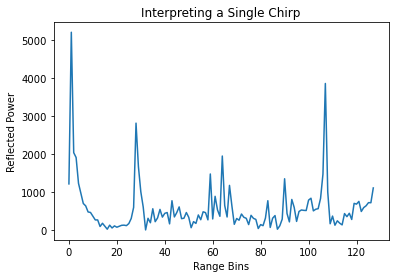

In [7]:
# Read in chirp data
adc_samples = np.loadtxt('../SavedData/assets/chirp.txt', dtype=np.complex_)
print("datainformation:",type(adc_samples),adc_samples.shape,"data[0]",adc_samples[0]) #<class 'numpy.ndarray'> (128,)data[0] (19+65375j)
# Manually cast to signed ints
adc_samples.real = adc_samples.real.astype(np.int16)
adc_samples.imag = adc_samples.imag.astype(np.int16)
print("adc_samples:",type(adc_samples),adc_samples.shape,"data[0]",adc_samples[0])
# Take a FFT across ADC samples
range_bins = np.fft.fft(adc_samples)  #<class 'numpy.ndarray'> (128,) data[0] (19-161j)
print("range_bins:",type(range_bins),range_bins.shape,"data[0]",range_bins[0])#(128,) data[0] (1212-87j)
# Plot the magnitudes of the range bins
plt.plot(np.abs(range_bins)) 
plt.xlabel('Range Bins')
plt.ylabel('Reflected Power')
plt.title('Interpreting a Single Chirp')
plt.show()

Range Resolution: 0.048828125 [meters]


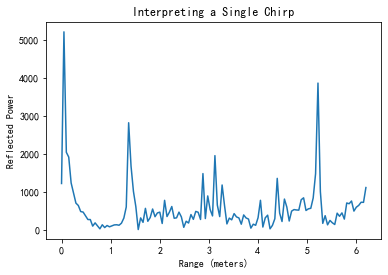

[0.         0.04882812 0.09765625 0.14648438 0.1953125  0.24414062
 0.29296875 0.34179688 0.390625   0.43945312 0.48828125 0.53710938
 0.5859375  0.63476562 0.68359375 0.73242188 0.78125    0.83007812
 0.87890625 0.92773438 0.9765625  1.02539062 1.07421875 1.12304688
 1.171875   1.22070312 1.26953125 1.31835938 1.3671875  1.41601562
 1.46484375 1.51367188 1.5625     1.61132812 1.66015625 1.70898438
 1.7578125  1.80664062 1.85546875 1.90429688 1.953125   2.00195312
 2.05078125 2.09960938 2.1484375  2.19726562 2.24609375 2.29492188
 2.34375    2.39257812 2.44140625 2.49023438 2.5390625  2.58789062
 2.63671875 2.68554688 2.734375   2.78320312 2.83203125 2.88085938
 2.9296875  2.97851562 3.02734375 3.07617188 3.125      3.17382812
 3.22265625 3.27148438 3.3203125  3.36914062 3.41796875 3.46679688
 3.515625   3.56445312 3.61328125 3.66210938 3.7109375  3.75976562
 3.80859375 3.85742188 3.90625    3.95507812 4.00390625 4.05273438
 4.1015625  4.15039062 4.19921875 4.24804688 4.296875   4.3457

In [5]:
# Data sampling configuration
c = 3e8 # Speed of light (m/s)
sample_rate = 2500 # Rate at which the radar samples from ADC (ksps - kilosamples per second)
freq_slope = 60 # Frequency slope of the chirp (MHz/us)
adc_samples = 128 # Number of samples from a single chirpb

# Calculating bandwidth of the chirp, accounting for unit conversion
chirp_bandwidth = (freq_slope * 1e12 * adc_samples) / (sample_rate * 1e3)

# Using our derived equation for range resolution
range_res = c / (2 * chirp_bandwidth)
print(f'Range Resolution: {range_res} [meters]')

# Apply the range resolution factor to the range indices
ranges = np.arange(adc_samples) * range_res
powers = np.abs(range_bins)

# Now we can plot again with an x-axis that makes sense
plt.plot(ranges, powers)
plt.xlabel('Range (meters)')
plt.ylabel('Reflected Power')
plt.title('Interpreting a Single Chirp')
plt.show()

chirp_bandwidth
print(ranges)

In [8]:
# Read in frame data
frame = np.load('../SavedData/assets/simple_frame_1.npy')

# Manually cast to signed ints
frame.real = frame.real.astype(np.int16)
frame.imag = frame.imag.astype(np.int16)

# Meta data about the data
num_chirps = 128 # Number of chirps in the frame
num_samples = 128 # Number of ADC samples per chirp

range infor: <class 'numpy.ndarray'> (128, 128)


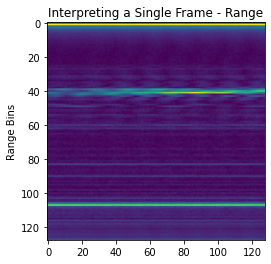

In [9]:
range_plot = np.fft.fft(frame, axis=1)
print("range infor:",type(range_plot),range_plot.shape)
# Visualize Results
plt.imshow(np.abs(range_plot).T)
plt.ylabel('Range Bins')
plt.title('Interpreting a Single Frame - Range')
plt.show()

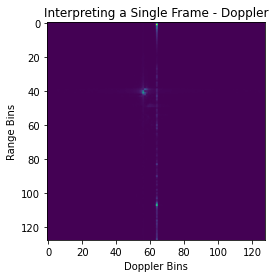

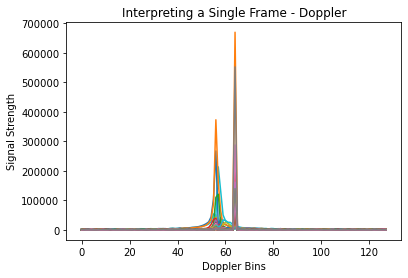

In [12]:
# Take a sequential FFT across the chirps
range_doppler = np.fft.fft(range_plot, axis=0)

# FFT shift the values (explained later)
range_doppler = np.fft.fftshift(range_doppler, axes=0)

# Visualize the range-doppler plot
# plt.imshow(np.log(np.abs(range_doppler).T))
plt.imshow(np.abs(range_doppler).T)
plt.xlabel('Doppler Bins')
plt.ylabel('Range Bins')
plt.title('Interpreting a Single Frame - Doppler')
plt.show()

plt.plot(np.abs(range_doppler))
plt.xlabel('Doppler Bins')
plt.ylabel('Signal Strength')
plt.title('Interpreting a Single Frame - Doppler')
plt.show()

In [13]:
print("frame infor:",type(frame),frame.shape)
# Range FFT -> Doppler FFT
range_bins = np.fft.fft(frame, axis=1)
fft_2d = np.fft.fft(range_bins, axis=0)

# Doppler FFT -> Range FFT
doppler_bins = np.fft.fft(frame, axis=0)
rfft_2d = np.fft.fft(doppler_bins, axis=1)

print('Max power difference: ', np.abs(fft_2d - rfft_2d).max())

frame infor: <class 'numpy.ndarray'> (128, 128)
Max power difference:  5.64766185425834e-11


In [14]:
# Data sampling configuration
c = 3e8 # Speed of light (m/s)
sample_rate = 2500 # Rate at which the radar samples from ADC (ksps - kilosamples per second)
freq_slope = 60 # Frequency slope of the chirp (MHz/us)
adc_samples = 128 # Number of samples from a single chirp

start_freq = 77.4201 # Starting frequency of the chirp (GHz)
idle_time = 30 # Time before starting next chirp (us)
ramp_end_time = 62 # Time after sending each chirp (us)
num_chirps = 128 # Number of chirps per frame
num_tx = 2 # Number of transmitters

# Range resolution
range_res = (c * sample_rate * 1e3) / (2 * freq_slope * 1e12 * adc_samples)
print(f'Range Resolution: {range_res} [meters/second]')

# Apply the range resolution factor to the range indices
ranges = np.arange(adc_samples) * range_res

Range Resolution: 0.048828125 [meters/second]


Velocity Resolution: 0.08226398402437117 [meters/second]


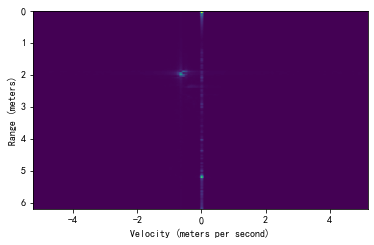

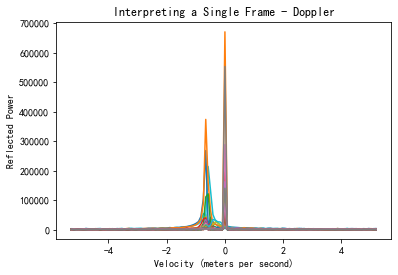

In [15]:
# Make sure your equation translates to the following
velocity_res = c / (2 * start_freq * 1e9 * (idle_time + ramp_end_time) * 1e-6 * num_chirps * num_tx)
print(f'Velocity Resolution: {velocity_res} [meters/second]')

# Apply the velocity resolution factor to the doppler indicies
velocities = np.arange(num_chirps) - (num_chirps // 2)
velocities = velocities * velocity_res

powers = np.abs(range_doppler)

# Plot with units
plt.imshow(powers.T, extent=[velocities.min(), velocities.max(), ranges.max(), ranges.min()])
plt.xlabel('Velocity (meters per second)')
plt.ylabel('Range (meters)')
plt.show()

plt.plot(velocities, powers)
plt.xlabel('Velocity (meters per second)')
plt.ylabel('Reflected Power')
plt.title('Interpreting a Single Frame - Doppler')
plt.show()

In [3]:
# Read in frame data
frame = np.load('../SavedData/assets/doppler_example_1.npy')

# Manually cast to signed ints
frame.real = frame.real.astype(np.int16)
frame.imag = frame.imag.astype(np.int16)

print(f'Shape of frame: {frame.shape}')

# Meta data about the data
num_chirps = 128 # Number of chirps in the frame
num_samples = 128 # Number of ADC samples per chirp

num_tx = 2
num_rx = 4
num_vx = num_tx * num_rx # Number of virtual antennas

Shape of frame: (128, 8, 128)


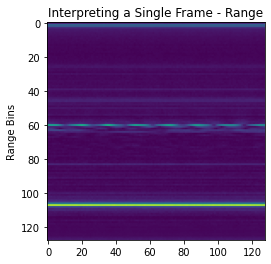

In [4]:
range_plot = np.fft.fft(frame, axis=2)

# Visualize Results
plt.imshow(np.abs(range_plot.sum(1)).T)
plt.ylabel('Range Bins')
plt.title('Interpreting a Single Frame - Range')
plt.show()

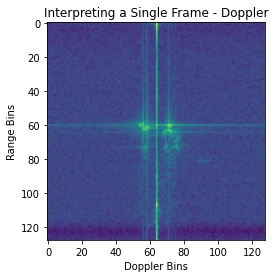

In [5]:
range_doppler = np.fft.fft(range_plot, axis=0)
range_doppler = np.fft.fftshift(range_doppler, axes=0)

# Visualize Results
plt.imshow(np.log(np.abs(range_doppler).T).sum(1))
plt.xlabel('Doppler Bins')
plt.ylabel('Range Bins')
plt.title('Interpreting a Single Frame - Doppler')
plt.show()

(128, 8, 128)
(128, 64, 128)


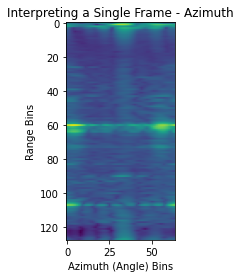

In [8]:
num_angle_bins = 64
print(range_doppler.shape)
padding = ((0,0), (0,num_angle_bins-range_doppler.shape[1]), (0,0))
range_azimuth = np.pad(range_doppler, padding, mode='constant')
range_azimuth = np.fft.fft(range_azimuth, axis=1)
range_azimuth = range_azimuth
print(range_azimuth.shape)
# Visualize Results
plt.imshow(np.log(np.abs(range_azimuth).sum(0).T))
plt.xlabel('Azimuth (Angle) Bins')
plt.ylabel('Range Bins')
plt.title('Interpreting a Single Frame - Azimuth')
plt.show()